<a href="https://colab.research.google.com/github/JKesly/Redes_Convolucionais_CUFS/blob/main/Classifica%C3%A7%C3%A3o_de_Redes_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 84% 95.0M/113M [00:00<00:00, 198MB/s]
100% 113M/113M [00:00<00:00, 153MB/s] 


In [3]:
print(files_in_photos)
print(len(files_in_photos))

['m1-011-01.jpg', 'm-039-01.jpg', 'm-065-01.jpg', 'm1-037-01.jpg', 'm-044-01.jpg', 'f1-004-01.jpg', 'm1-039-01.jpg', 'm-038-01.jpg', 'm-099-01.jpg', 'm1-005-01.jpg', 'm-016-01.jpg', 'm1-007-01.jpg', 'm-073-01.jpg', 'f-043-01.jpg', 'f-010-01.jpg', 'm-015-01.jpg', 'm-085-01.jpg', 'm-034-01.jpg', 'm1-028-01.jpg', 'm-049-01.jpg', 'm-091-01.jpg', 'm1-036-01.jpg', 'm-018-01.jpg', 'm-077-01.jpg', 'f-033-01.jpg', 'm-097-01.jpg', 'm-095-01.jpg', 'm-031-01.jpg', 'f-027-01.jpg', 'm-027-01.jpg', 'm-025-01.jpg', 'f-018-01.jpg', 'f1-011-01.jpg', 'f-024-01.jpg', 'm-089-01.jpg', 'f1-012-01.jpg', 'm-096-01.jpg', 'f-026-01.jpg', 'm1-023-01.jpg', 'm-041-01.jpg', 'f-039-01.jpg', 'm-010-01.jpg', 'f1-007-01.jpg', 'm-071-01.jpg', 'f1-001-01.jpg', 'm1-017-01.jpg', 'm-069-01.jpg', 'f-008-01.jpg', 'm-014-01.jpg', 'm-075-01.jpg', 'f1-010-01.jpg', 'm-052-01.jpg', 'm-061-01.jpg', 'm-019-01.jpg', 'f-022-01.jpg', 'm1-024-01.jpg', 'm-050-01.jpg', 'm-029-01.jpg', 'm1-038-01.jpg', 'f-005-01.jpg', 'm-037-01.jpg', 'm1-01

In [2]:
#conectando o database com o google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importando livrarias
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from keras.models import load_model


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as k


In [4]:
import skimage.io as io
from skimage.transform import resize
from skimage.io import imread

from skimage.color import rgb2gray
import glob

In [5]:
#parametros inicias
img_dims = (250,200, 3)
batch_size = 32

data = []
labels = []

In [6]:
#importando imagens
#img_file = os.path.isdir("/content/drive/MyDrive/F-M-Photos")
#random.shuffle(files_in_photos)

image_path = [f for f in glob.glob(r'C:\Users\kesly\Downloads\Images\photos' + "##-###-##", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_path)

In [7]:
for img in files_in_photos:

  image_path = os.path.join(photos_folder, img)
  image = cv2.imread(image_path)

  if image is None:
    print(f"Error: Could not load image at {image_path}")
    continue  # Skip to the next image if loading failed

  image = cv2.resize(image, (250, 200))
  image = img_to_array(image)
  data.append(image)

  if img.startswith("f-"):
    label = 1   #mulher
  else:
    label = 0  #homem
  labels.append(label)


In [8]:
# Pre-processamento
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [9]:
from re import X
# Dividindo dataset entre treinamento e validação

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


In [19]:
# Verificando o tamanho das imagens
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(120, 200, 250, 3)
(38, 200, 250, 3)
(30, 200, 250, 3)


In [20]:
# Verificando se os valores RGB estão dentro do intervalo [0,1]
X_train[1,:]


array([[[0.92941176, 0.82352941, 0.48627451],
        [0.92941176, 0.82352941, 0.48627451],
        [0.92941176, 0.82352941, 0.48627451],
        ...,
        [0.02352941, 0.01176471, 0.00784314],
        [0.01568627, 0.00392157, 0.        ],
        [0.01568627, 0.00784314, 0.        ]],

       [[0.92941176, 0.82352941, 0.48627451],
        [0.92941176, 0.82352941, 0.48627451],
        [0.92941176, 0.82352941, 0.48627451],
        ...,
        [0.35294118, 0.32156863, 0.21568627],
        [0.35686275, 0.3254902 , 0.21176471],
        [0.36470588, 0.33333333, 0.20784314]],

       [[0.93333333, 0.82745098, 0.49019608],
        [0.93333333, 0.82745098, 0.49019608],
        [0.93333333, 0.82745098, 0.49019608],
        ...,
        [0.91764706, 0.84313725, 0.55686275],
        [0.90980392, 0.83529412, 0.54901961],
        [0.90196078, 0.83137255, 0.54117647]],

       ...,

       [[0.        , 0.00784314, 0.00392157],
        [0.0745098 , 0.09411765, 0.08627451],
        [0.16862745, 0

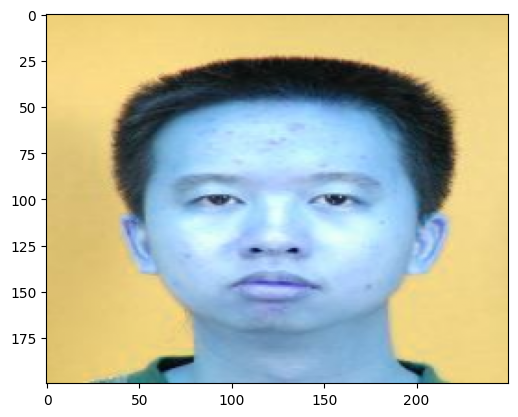

In [127]:
# Verificando dataset atual
plt.imshow(X_train[1])

# **Gerando Modelo Convolucional 1**

In [39]:
model = Sequential ()

model.add(Conv2D(32, (3, 3), input_shape=(250, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))   #Sigmoid é usada já que a classificação aqui é binária


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [138]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 248, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 248, 198, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 124, 99, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 122, 97, 32)         │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 122, 97, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 61, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 93696)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       5,996,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,006,817 (22.91 MB)

 Trainable params: 6,006,817 (22.91 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8302 - loss: 1.8645 - val_accuracy: 0.8667 - val_loss: 0.3725
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4706 - loss: 0.7799 - val_accuracy: 0.8667 - val_loss: 0.3943
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7760 - loss: 0.5105 - val_accuracy: 0.8667 - val_loss: 0.3788
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8281 - loss: 0.4038 - val_accuracy: 0.8667 - val_loss: 0.4176
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8000 - loss: 0.4281 - val_accuracy: 0.8667 - val_loss: 0.3488
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7900 - loss: 0.4280 - val_accuracy: 0.8667 - val_loss: 0.3238
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8325 - loss: 0.3277 - val_accuracy: 0.8667 - val_loss: 0.3084
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9110 - loss: 0.3451 - val_accuracy: 0.9333 - val_loss: 0.3202
Epoch 9/10

In [42]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7971 - loss: 0.4059


[0.4070394039154053, 0.7894737124443054]

In [43]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

cm_reorg = np.array([[tp, fn], [fp, tn]])

print("Matriz de Confusão Reorganizada:")
print(cm_reorg)

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step
Matriz de Confusão Reorganizada:
[[ 5  5]
 [ 3 25]]


# **Fazendo Predições**

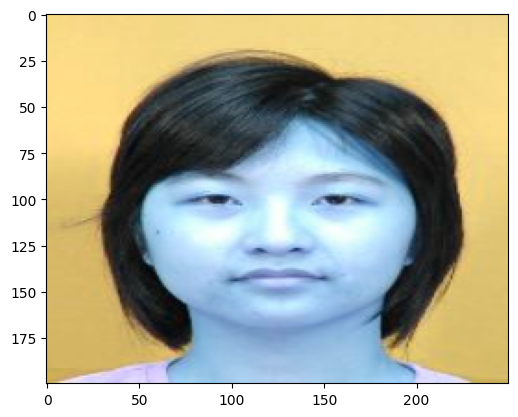

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predição do modelo: Mulher


In [148]:
#idx2 = {0: "homem", 1: "mulher"}
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2].reshape(1, 250, 200, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
  pred = "Homem"
else:
  pred = "Mulher"

print("Predição do modelo: " + pred)
#print("Probabilidade: ", y_pred)


In [ ]:
model.save('cnn_mdel1')

# **Modelo Convolucional 2**

In [31]:
model = Sequential ()

model.add(Conv2D(9, (5, 5), padding = 'same', input_shape=(250, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(18, (5, 5), padding = 'same', input_shape=(250, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [152]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 250, 200, 9)         │             684 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 250, 200, 9)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 125, 100, 9)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 100, 18)        │           4,068 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 125, 100, 18)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 50, 18)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 55800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │         558,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 562,773 (2.15 MB)

 Trainable params: 562,773 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7917 - loss: 2.4835e-08 - val_accuracy: 0.8667 - val_loss: 1.5895e-08
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7917 - loss: 2.4835e-08 - val_accuracy: 0.8667 - val_loss: 1.5895e-08
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7917 - loss: 2.4835e-08 - val_accuracy: 0.8667 - val_loss: 1.5895e-08
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7917 - loss: 2.4835e-08 - val_accuracy: 0.8667 - val_loss: 1.5895e-08
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.7917 - loss: 2.4835e-08 - val_accuracy: 0.8667 - val_loss: 1.5895e-08
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7917 - loss: 2.4835e-08 - val_accuracy: 0.8667 - val_loss: 1.5895e-08
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7917 - loss: 2.4835e-08 - val_accuracy: 0.8667 - val_loss: 1.5895e-08
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.7917 - loss: 2.4835e-08

In [34]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.7308 - loss: 3.2090e-08


[3.1370870345881485e-08, 0.7368420958518982]

In [38]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

#Reorganizando a Matriz de Confusão

cm_reorg = np.array([[tp, fn], [fp, tn]])

print("Matriz de Confusão Reorganizada:")
print(cm_reorg)
#print("Matriz de Confusão:")
#print(cm)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step
True Negatives:  28
False Positives:  0
False Negatives:  10
True Positives:  0
Matriz de Confusão Reorganizada:
[[ 0 10]
 [ 0 28]]


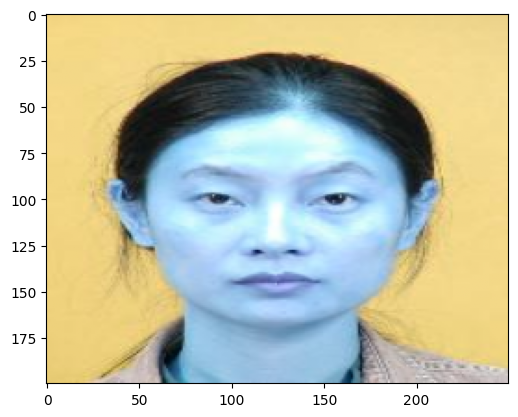

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predição do modelo: Homem


In [165]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2].reshape(1, 250, 200, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
  pred = "Homem"
else:
  pred = "Mulher"

print("Predição do modelo: " + pred)

In [ ]:
# Este segundo modelo sempre prediz que a imagem se trata de um 'Homem', mostrando provavelmente um Overfitting

In [ ]:
model.save('cnn_mdel2')

# **Gerando Modelo 3**

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=(250, 200, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 250, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 250, 200, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 250, 200, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 125, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 125, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 125, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 125, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 125, 100, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 125, 100, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 125, 100, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │      16,000,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 16,094,205 (61.39 MB)

 Trainable params: 16,093,737 (61.39 MB)

 Non-trainable params: 468 (1.83 KB)

In [13]:
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 52s 12s/step - accuracy: 0.6825 - loss: 0.8796 - val_accuracy: 0.8000 - val_loss: 0.5935
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 85s 13s/step - accuracy: 0.7060 - loss: 0.6939 - val_accuracy: 0.8667 - val_loss: 0.6019
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 78s 11s/step - accuracy: 0.6960 - loss: 0.7281 - val_accuracy: 0.8667 - val_loss: 0.6050
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 86s 12s/step - accuracy: 0.7450 - loss: 0.6780 - val_accuracy: 0.8667 - val_loss: 0.5620
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 78s 11s/step - accuracy: 0.8244 - loss: 0.5349 - val_accuracy: 0.8667 - val_loss: 0.5229


In [14]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 667ms/step - accuracy: 0.7308 - loss: 0.5997


[0.5961198210716248, 0.7368420958518982]

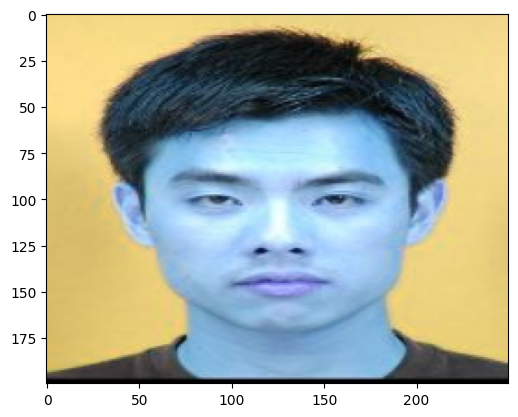

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predição do modelo: Homem


In [25]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2].reshape(1, 250, 200, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
  pred = "Homem"
else:
  pred = "Mulher"

print("Predição do modelo: " + pred)

In [ ]:
#O modelo 3 apresenta custo computacional mais elevado quê os dois primeiros